In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

In [2]:
from sklearn.datasets import fetch_mldata

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
mnist = fetch_mldata('MNIST original')

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


TimeoutError: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond

In [6]:
print(type(mnist))

<class 'sklearn.utils.Bunch'>


the datasets from fetch_mldata get imported as a dictionay-like object "Bunch" which has some "data" and some "metadata"

In [7]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [8]:
X, y = mnist["data"], mnist["target"]

In [9]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [10]:
X.shape, y.shape

((70000, 784), (70000,))

784 columns of features represent 784 pixels from a 28x28 grid. print the very first row and see what you get!

In [11]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

Wow! What does that first row represent?

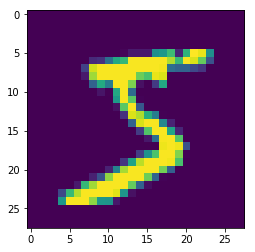

In [12]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [13]:
y[0]

'5'

Makes sense! This is the data. Always remember to explore the data & features any way possible before working with yur dataset. Next, split data into train/test partitions, but this particular dataset use last 10,000 images as test.

In [14]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

In [15]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [16]:
shuffle_index = np.random.permutation(60000)

In [17]:
print(type(shuffle_index), len(shuffle_index),shuffle_index)

<class 'numpy.ndarray'> 60000 [ 7991 31001 15024 ... 14658 29117 17047]


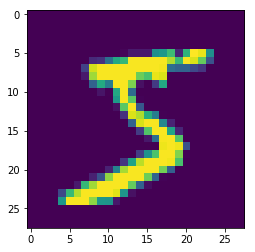

In [18]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

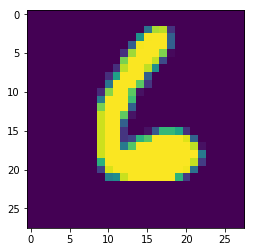

In [19]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

What did we do above and can yo see the result of the code? 
We "shuffled" the training data. This is not commonly done, but in this case let's discuss why this might be done. Any thoughts?

Below we turn to building a classification model on the image dataset. Mainly we take a simpler version of the problem - detecting a single image (5 or not-5)

In this process you will see both how to build a classifier, but more important, in this chapter, focus a little on understanding evaluation metrics such as accuracies, confusion matrix, TP/FP and the ROC Curve


In [20]:
print(y_train[:30])
y_train_5 = (y_train == 5) #true when a y train value is 5
y_test_5 = (y_test == 5) #similar 
print(y_train_5[:30]) #check the before and after y values for the first 20 rows

['6' '1' '5' '1' '6' '0' '9' '9' '9' '5' '5' '3' '3' '3' '5' '1' '3' '9'
 '6' '2' '7' '7' '8' '0' '2' '5' '1' '8' '1' '7']
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]


We are going to pick any classifier, but will go with SGDC, the one described in ch. 3. How SGDC works is less relevant now (when we discuss SVMs it will become clearer)

In [21]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
type(sgd)

sklearn.linear_model.stochastic_gradient.SGDClassifier

In [22]:
sgd.fit(X_train, y_train_5)
sgd.predict(X_test[0:25])
# this is exactly how you train and use (for prediction) any classifier in python sklearn
# simply call fit for the model, and predict when you want to make any prediction.
# in this case we are predicting for the first 25 entries in the test set, which 
# turn out to be all zeros by the way


C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


ValueError: The number of classes has to be greater than one; got 1 class

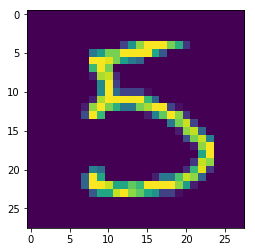

In [23]:
some_digit = X_test[15] # checking what the image for the 16th point is, since
# our model has predicting "TRUE" for digit "5", but as you can see from running
# the code, the model in thie case made a mistake
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [24]:
sgd.predict(X_test[5500:5525])
# this shows a part of the test data which are all "5"s, 
# so the model should hopefully predict 5 for these data

IndexError: tuple index out of range

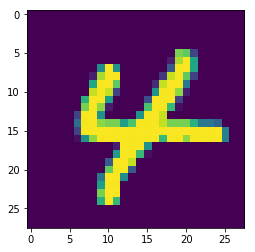

In [25]:
some_digit = X_test[5500]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

Next, below we will use cross-validation to test the accuracy of the model, check out the confusion matrix and then the ROC curve (we will discuss more details on what these are in class)

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cross_val_score(sgd, X_train, y_train_5, cv=3, scoring="accuracy")

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: The number of classes has to be greater than one; got 1 class

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_5_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


ValueError: The number of classes has to be greater than one; got 1 class

In [29]:
len(y_train_5_pred) 

#check that all points have predictions 
# (as we discussed in crossvalidation)

NameError: name 'y_train_5_pred' is not defined

Now there are 60,000 actual y values in y_train_5, and there are 60000 y values in y_train_5_pred. Comparing the two can give you the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_5_pred) # actual vs predicted

Try next to work through pages 86-88 to compute all the specific scores. 
We will switch to building the ROC curve here next

In [ ]:
y_train_5_pred_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3, method = "decision_function")

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_train_5_pred_scores)

In [ ]:
fpr, len(fpr), tpr, len(tpr)

In [ ]:
plt.plot(fpr, tpr)
plt.show()

The book chapter has a nicer plot, and a function that plots it better!
Next work through pages 92-99 in class to wrap up Chap 3